# Check dictionary properties

## Imports & functions

In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from boostlets_mod import get_boostlets_dict, genBoostlet
from mod_RIRIS_func import load_sk, ffst, iffst
from mod_plotting_utilities import plot_array_images, plot_ls_images

In [12]:
def check_dic(Sk, f_plot=False):
    A = np.sum(Sk*Sk, axis=2)

    if f_plot:
        print()
        print(" valores de Sk.*Sk :")
        print(f" mean: {A.mean()}")
        print(f" real min: {A.real.min()}")
        print(f" real max: {A.real.max()}")

        nx = A.shape[1]
        ny = A.shape[0]
        xax = np.arange(nx) - (nx//2)
        yax = np.arange(ny) - (ny//2)

        fig, ax = plt.subplots(1,1)
        c1 = ax.pcolor(xax, yax, np.abs(A))
        ax.grid('on')
        plt.colorbar(c1)
        plt.show()

    return A

    

## Load dictionary or generate boostlets

In [23]:

N=100
S=2
# phi0 = genBoostlet(N, a_i = S-1, theta_j=0.0, far_or_near=0, boost_type=1)[0]
# print(phi0.shape)

from boostlets_mod import computeDiffeo

a_i = S-1
theta_j=0.0 
far_or_near=0
boost_type=1

om = np.linspace(-1, 1, N)
kx = np.linspace(-1, 1, N)
KX, OM = np.meshgrid(kx, om)

# Define boost/dilation matrix
M_a_theta = np.array([
    [a_i * np.cosh(theta_j), -a_i * np.sinh(theta_j)],
    [-a_i * np.sinh(theta_j), a_i * np.cosh(theta_j)]
])
boosted_points = np.einsum('ij,xyj->xyi', M_a_theta, np.dstack((KX, OM)))
KX_atheta = boosted_points[:, :, 0]
OM_atheta = boosted_points[:, :, 1]
# Apply diffeomorphism to boosted/dilated points
Ad, Th = computeDiffeo(OM_atheta, KX_atheta, far_or_near)

print(Ad.shape)

(100, 100)


Generating boostlet dictionary. N=100, S=1, n_thetas=0
Generating boostlet dictionary. N=100, S=1, n_thetas=1
Generating boostlet dictionary. N=100, S=1, n_thetas=2
Generating boostlet dictionary. N=100, S=1, n_thetas=3
Generating boostlet dictionary. N=100, S=1, n_thetas=4
Generating boostlet dictionary. N=100, S=1, n_thetas=5
Generating boostlet dictionary. N=100, S=1, n_thetas=6
Generating boostlet dictionary. N=100, S=1, n_thetas=7
Generating boostlet dictionary. N=100, S=1, n_thetas=8
Generating boostlet dictionary. N=100, S=1, n_thetas=9
Generating boostlet dictionary. N=100, S=1, n_thetas=10
Generating boostlet dictionary. N=100, S=1, n_thetas=11
Generating boostlet dictionary. N=100, S=1, n_thetas=12
Generating boostlet dictionary. N=100, S=1, n_thetas=13
Generating boostlet dictionary. N=100, S=1, n_thetas=14
Generating boostlet dictionary. N=100, S=1, n_thetas=15
Generating boostlet dictionary. N=100, S=1, n_thetas=16
Generating boostlet dictionary. N=100, S=1, n_thetas=17
Ge

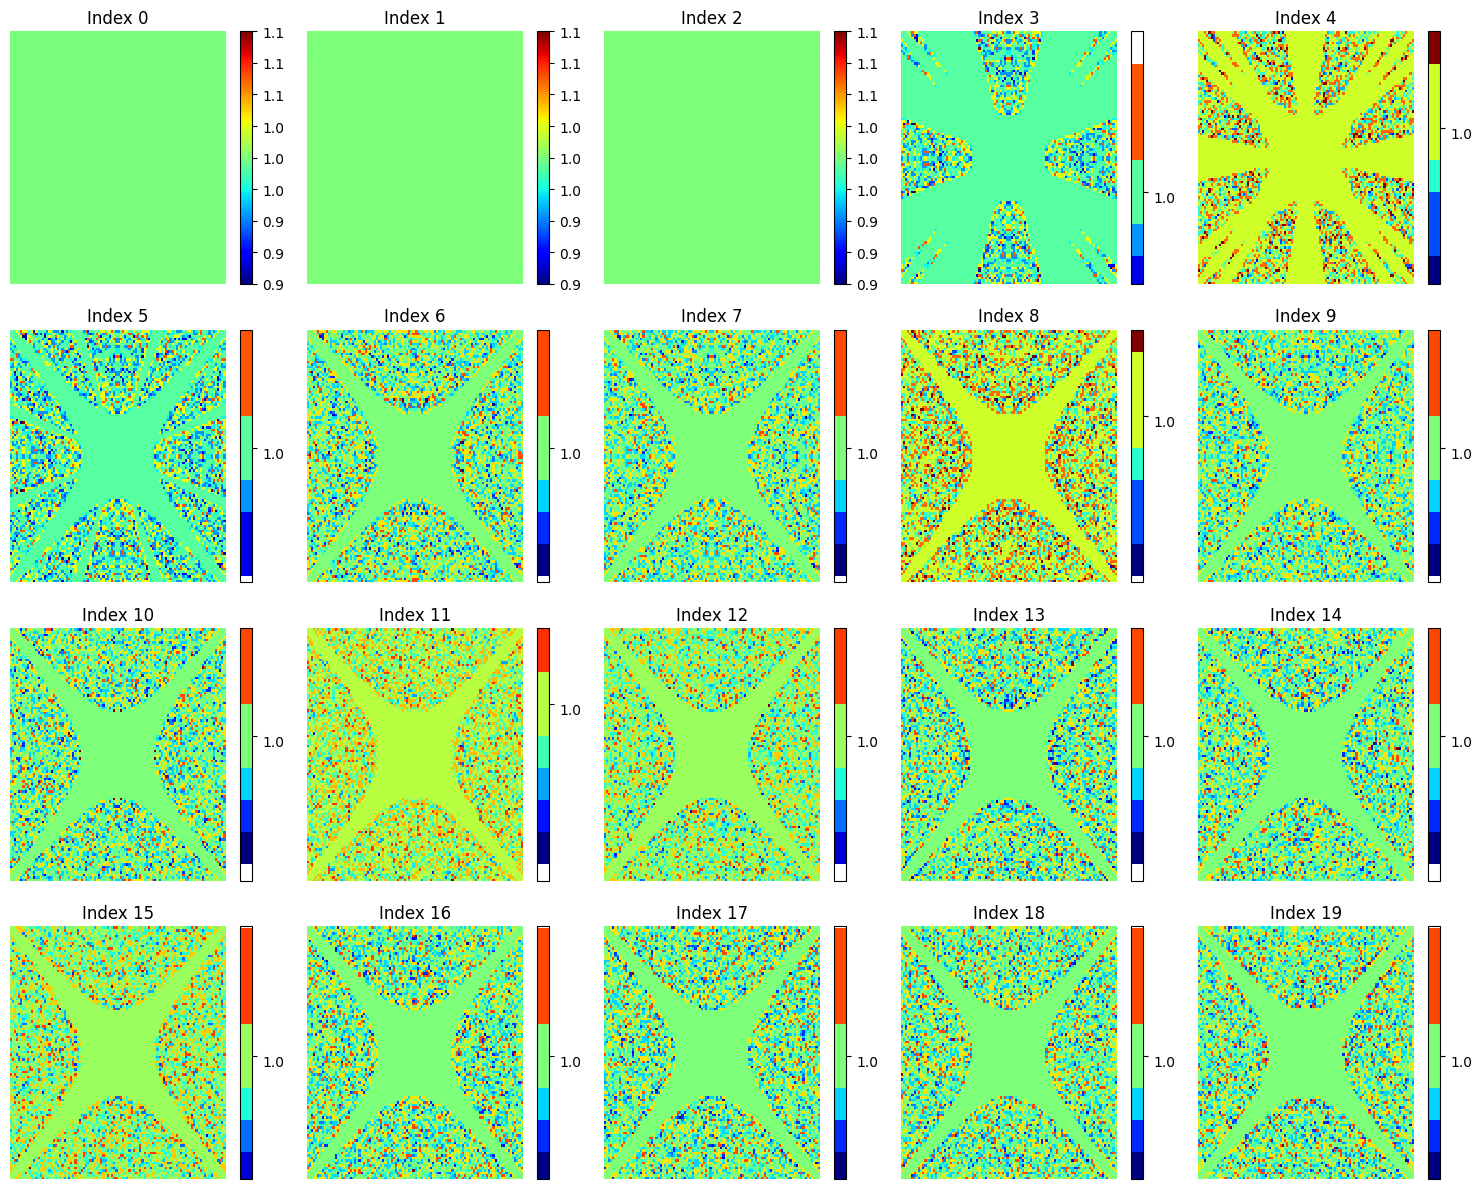

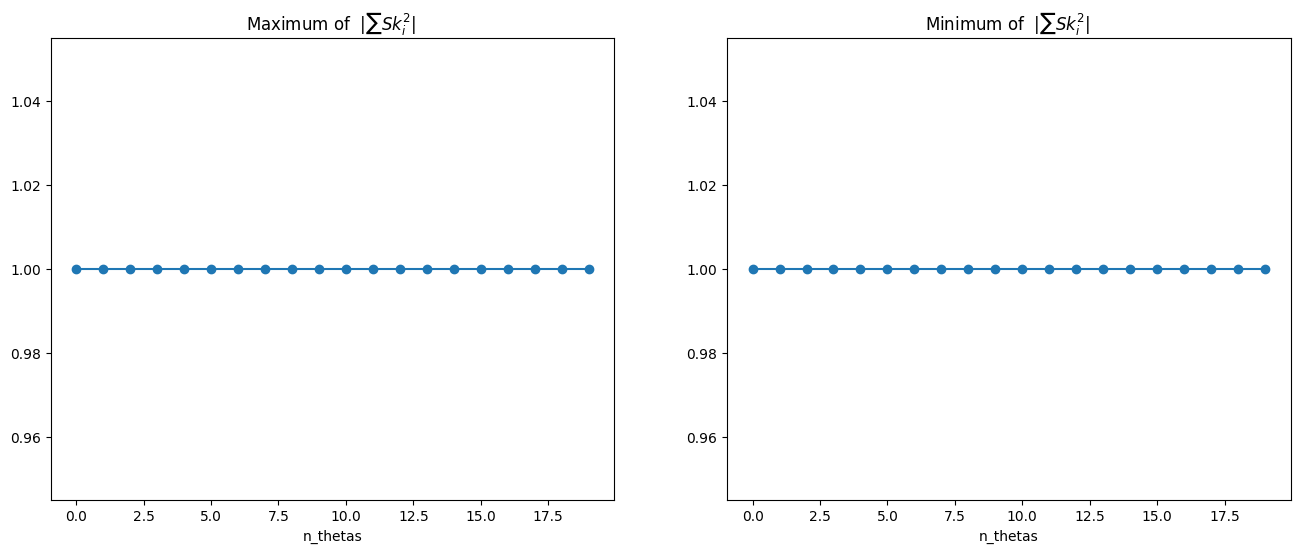

In [24]:
Sk = []
Sk2 = []
N, S = 100, 1
for n_thetas in range(20):
    build_dict = dict(Sk_type = 'boostlet', N = N, S = S, n_thetas = n_thetas)

    temp = load_sk(folder='./', file='dummy', build_dict=build_dict)
    temp = temp / np.sqrt((np.sum(temp*temp, axis=2)))[:, :, np.newaxis] # Extra adimensionalizacion
    Sk.append( temp )

    Sk2.append( check_dic(Sk[n_thetas]) )    

plot_array_images(Sk2, num_cols=5)

max_vals = [ np.max( np.abs(sk2) ) for sk2 in Sk2 ]
min_vals = [ np.min( np.abs(sk2) ) for sk2 in Sk2 ]
data = [max_vals, min_vals]
xaxes = [range(len(max_vals)), range(len(max_vals))]
titles = [r"Maximum of  $|\sum Sk_i^2|$ ", r"Minimum of  $|\sum Sk_i^2|$ "]
fig, axes = plt.subplots(1, len(data), figsize=(16,6))
plots = [ax.plot(xax, d, '-o' ) for ax, d, xax in zip(axes, data, xaxes)]

labels = [ax.set_xlabel( r"n_thetas" ) for ax in axes]
ttl = [ax.set_title( titl ) for ax, titl in zip(axes, titles)]
plt.show()

Generating boostlet dictionary. N=100, S=3, n_thetas=0
Generating boostlet dictionary. N=100, S=3, n_thetas=1
Generating boostlet dictionary. N=100, S=3, n_thetas=2
Generating boostlet dictionary. N=100, S=3, n_thetas=3
Generating boostlet dictionary. N=100, S=3, n_thetas=4
Generating boostlet dictionary. N=100, S=3, n_thetas=5
Generating boostlet dictionary. N=100, S=3, n_thetas=6
Generating boostlet dictionary. N=100, S=3, n_thetas=7
Generating boostlet dictionary. N=100, S=3, n_thetas=8
Generating boostlet dictionary. N=100, S=3, n_thetas=9
Generating boostlet dictionary. N=100, S=3, n_thetas=10
Generating boostlet dictionary. N=100, S=3, n_thetas=11
Generating boostlet dictionary. N=100, S=3, n_thetas=12
Generating boostlet dictionary. N=100, S=3, n_thetas=13
Generating boostlet dictionary. N=100, S=3, n_thetas=14
Generating boostlet dictionary. N=100, S=3, n_thetas=15
Generating boostlet dictionary. N=100, S=3, n_thetas=16
Generating boostlet dictionary. N=100, S=3, n_thetas=17
Ge

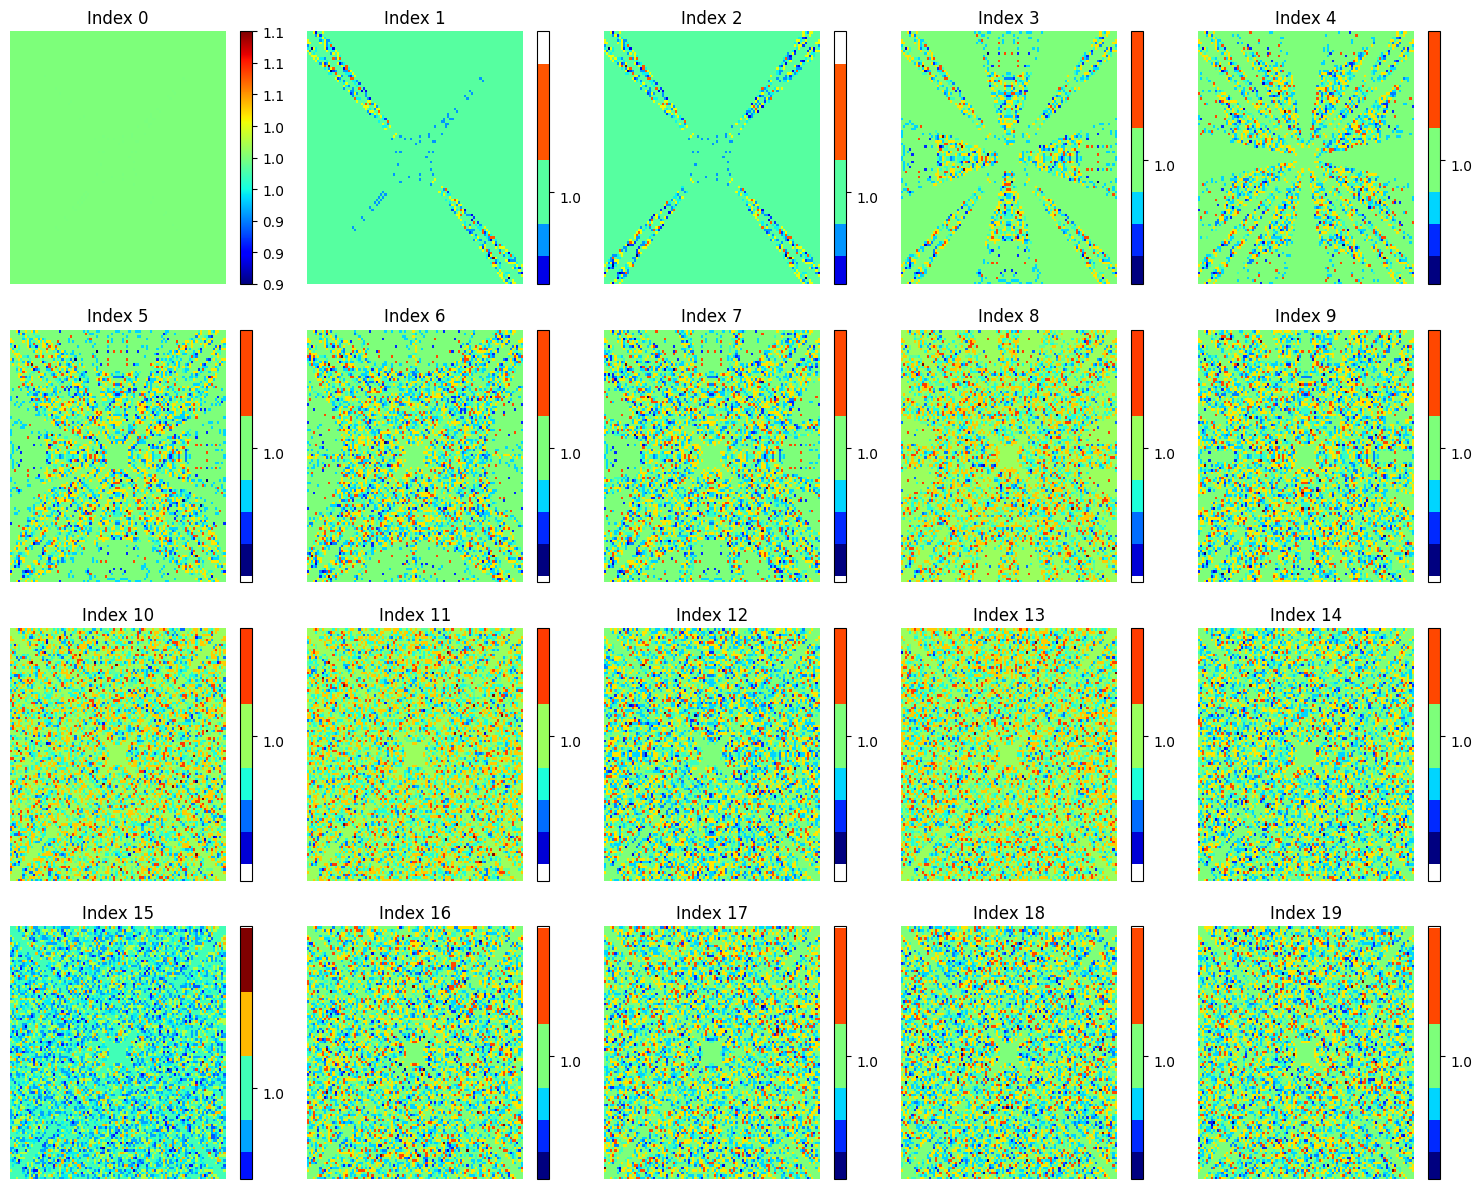

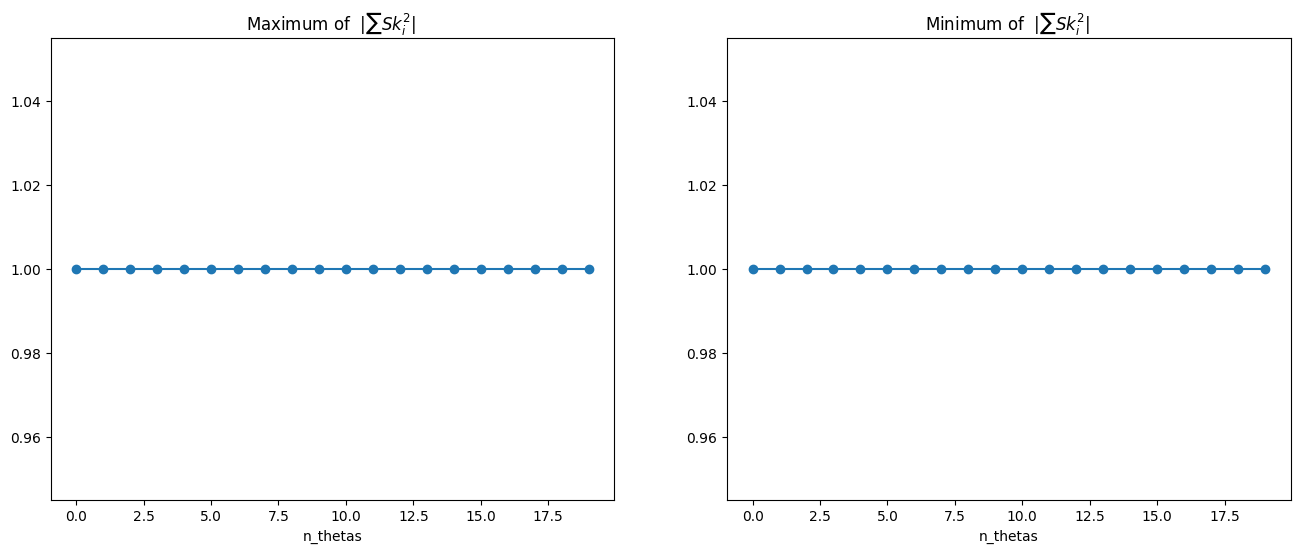

In [25]:
Sk = []
Sk2 = []
N, S = 100, 3

fact = []
for n_thetas in range(20):
    build_dict = dict(Sk_type = 'boostlet', N = N, S = S, n_thetas = n_thetas)
    temp = load_sk(folder='./', file='dummy', build_dict=build_dict)

    # Añadir 1s donde no se rellene por los boostlets
    mask_not_covered = np.sqrt((np.sum(temp*temp, axis=2))) == 0.0
    temp[:,:,0] += np.ones_like(mask_not_covered)*mask_not_covered


    fact.append(np.sqrt((np.sum(temp*temp, axis=2)))[:, :, np.newaxis]) 
    temp = temp / np.sqrt((np.sum(temp*temp, axis=2)))[:, :, np.newaxis] # Extra adimensionalizacion

    Sk.append( temp )

    Sk2.append( check_dic(Sk[n_thetas]) )    

plot_array_images(Sk2, num_cols=5)

max_vals = [ np.max( np.abs(sk2) ) for sk2 in Sk2 ]
min_vals = [ np.min( np.abs(sk2) ) for sk2 in Sk2 ]
data = [max_vals, min_vals]
xaxes = [range(len(max_vals)), range(len(max_vals))]
titles = [r"Maximum of  $|\sum Sk_i^2|$ ", r"Minimum of  $|\sum Sk_i^2|$ "]
fig, axes = plt.subplots(1, len(data), figsize=(16,6))
plots = [ax.plot(xax, d, '-o' ) for ax, d, xax in zip(axes, data, xaxes)]

labels = [ax.set_xlabel( r"n_thetas" ) for ax in axes]
ttl = [ax.set_title( titl ) for ax, titl in zip(axes, titles)]
plt.show()

Generating boostlet dictionary. N=100, S=4, n_thetas=0
Generating boostlet dictionary. N=100, S=4, n_thetas=1
Generating boostlet dictionary. N=100, S=4, n_thetas=2
Generating boostlet dictionary. N=100, S=4, n_thetas=3
Generating boostlet dictionary. N=100, S=4, n_thetas=4
Generating boostlet dictionary. N=100, S=4, n_thetas=5
Generating boostlet dictionary. N=100, S=4, n_thetas=6
Generating boostlet dictionary. N=100, S=4, n_thetas=7
Generating boostlet dictionary. N=100, S=4, n_thetas=8
Generating boostlet dictionary. N=100, S=4, n_thetas=9
Generating boostlet dictionary. N=100, S=4, n_thetas=10
Generating boostlet dictionary. N=100, S=4, n_thetas=11
Generating boostlet dictionary. N=100, S=4, n_thetas=12
Generating boostlet dictionary. N=100, S=4, n_thetas=13
Generating boostlet dictionary. N=100, S=4, n_thetas=14
Generating boostlet dictionary. N=100, S=4, n_thetas=15
Generating boostlet dictionary. N=100, S=4, n_thetas=16
Generating boostlet dictionary. N=100, S=4, n_thetas=17
Ge

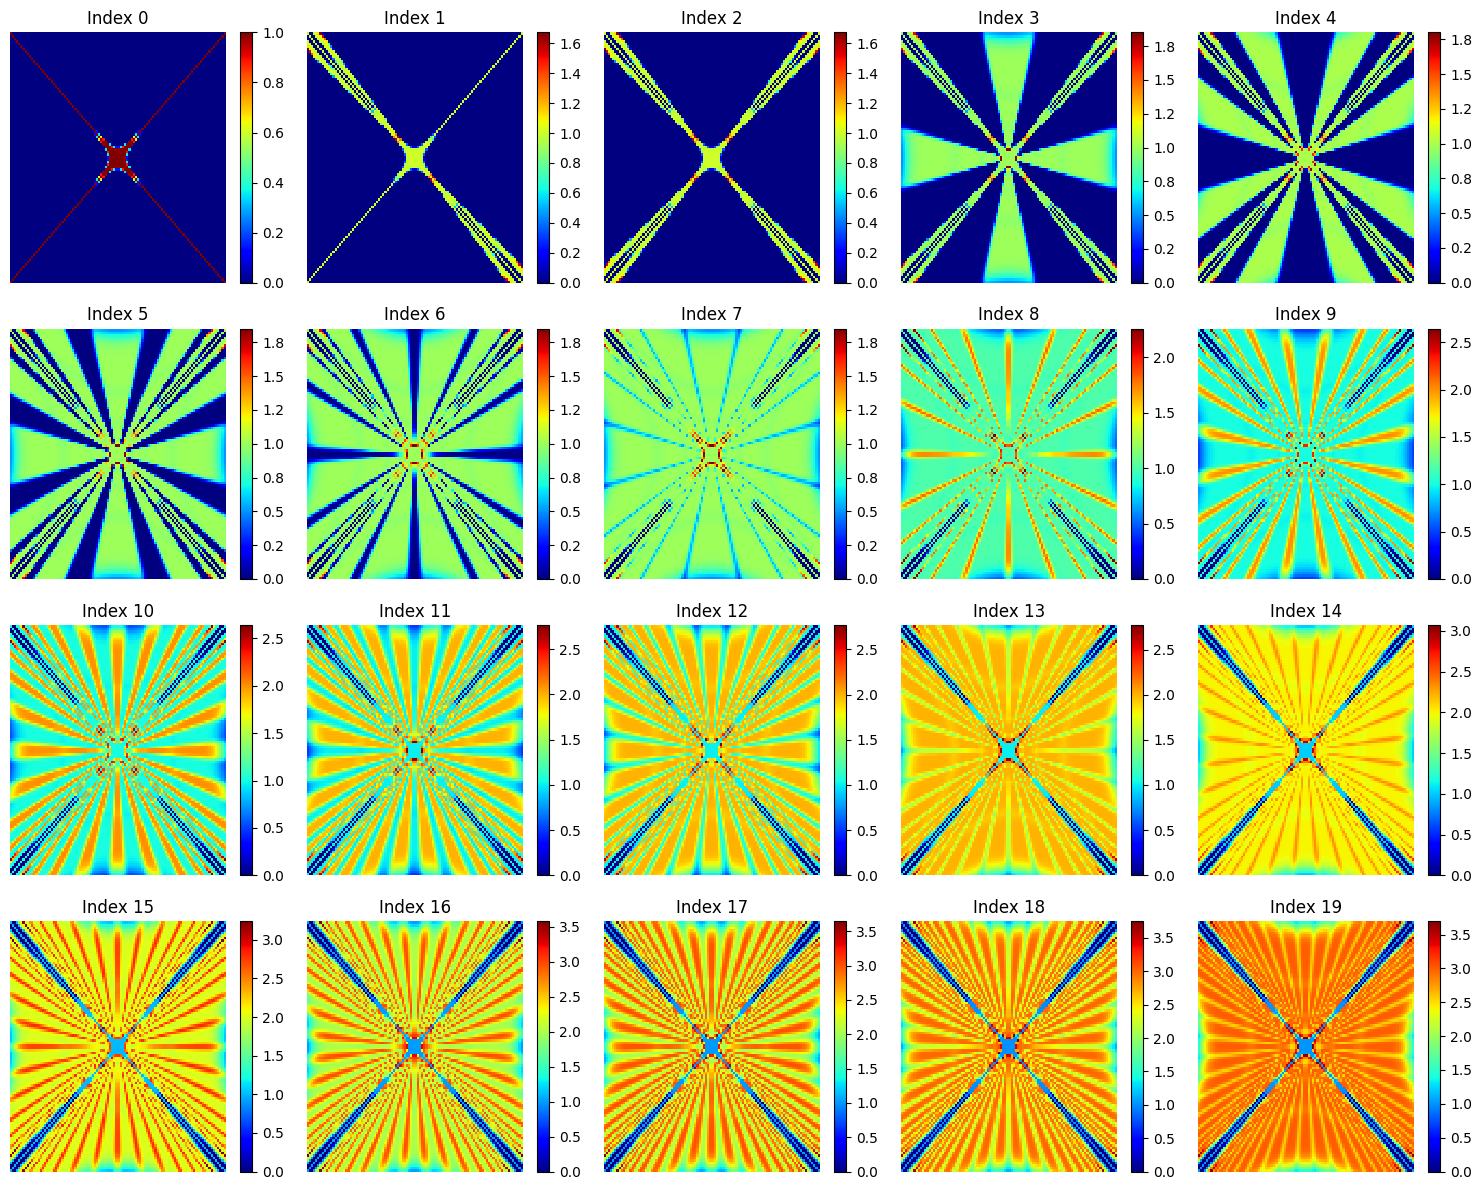

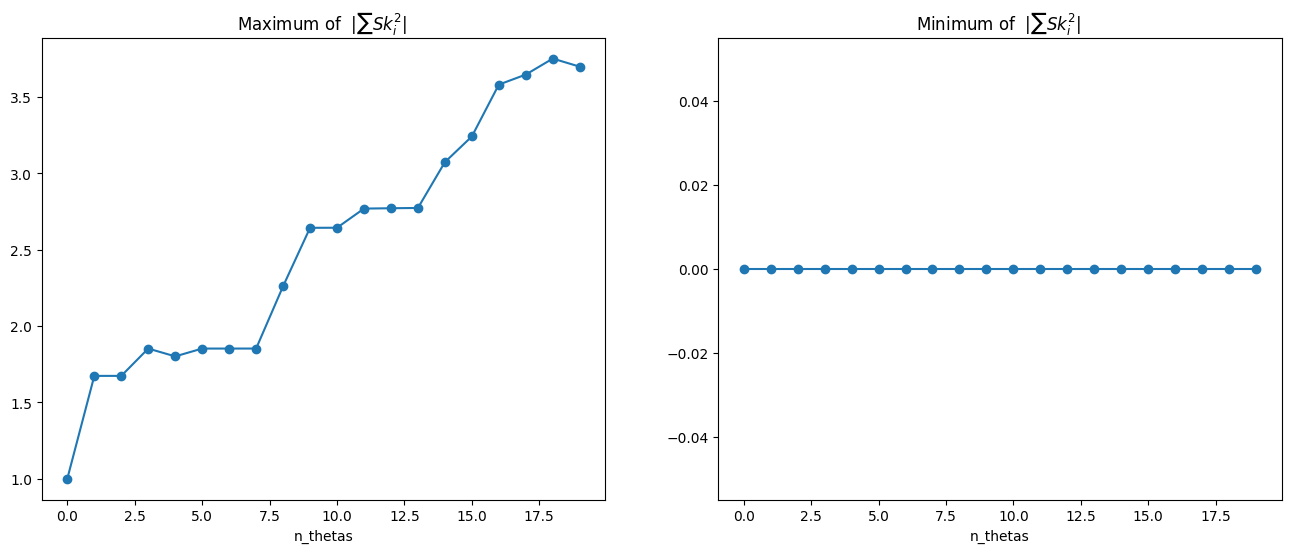

In [26]:
Sk = []
Sk2 = []
N, S = 100, 4
for n_thetas in range(20):
    build_dict = dict(Sk_type = 'boostlet', N = N, S = S, n_thetas = n_thetas)
    Sk.append( load_sk(folder='./', file='dummy', build_dict=build_dict))
    Sk2.append( check_dic(Sk[n_thetas]) )    

plot_array_images(Sk2, num_cols=5)

max_vals = [ np.max( np.abs(sk2) ) for sk2 in Sk2 ]
min_vals = [ np.min( np.abs(sk2) ) for sk2 in Sk2 ]
data = [max_vals, min_vals]
xaxes = [range(len(max_vals)), range(len(max_vals))]
titles = [r"Maximum of  $|\sum Sk_i^2|$ ", r"Minimum of  $|\sum Sk_i^2|$ "]
fig, axes = plt.subplots(1, len(data), figsize=(16,6))
plots = [ax.plot(xax, d, '-o' ) for ax, d, xax in zip(axes, data, xaxes)]

labels = [ax.set_xlabel( r"n_thetas" ) for ax in axes]
ttl = [ax.set_title( titl ) for ax, titl in zip(axes, titles)]
plt.show()

Generating boostlet dictionary. N=100, S=5, n_thetas=0
Generating boostlet dictionary. N=100, S=5, n_thetas=1
Generating boostlet dictionary. N=100, S=5, n_thetas=2
Generating boostlet dictionary. N=100, S=5, n_thetas=3
Generating boostlet dictionary. N=100, S=5, n_thetas=4
Generating boostlet dictionary. N=100, S=5, n_thetas=5
Generating boostlet dictionary. N=100, S=5, n_thetas=6
Generating boostlet dictionary. N=100, S=5, n_thetas=7
Generating boostlet dictionary. N=100, S=5, n_thetas=8
Generating boostlet dictionary. N=100, S=5, n_thetas=9
Generating boostlet dictionary. N=100, S=5, n_thetas=10
Generating boostlet dictionary. N=100, S=5, n_thetas=11
Generating boostlet dictionary. N=100, S=5, n_thetas=12
Generating boostlet dictionary. N=100, S=5, n_thetas=13
Generating boostlet dictionary. N=100, S=5, n_thetas=14
Generating boostlet dictionary. N=100, S=5, n_thetas=15
Generating boostlet dictionary. N=100, S=5, n_thetas=16
Generating boostlet dictionary. N=100, S=5, n_thetas=17
Ge

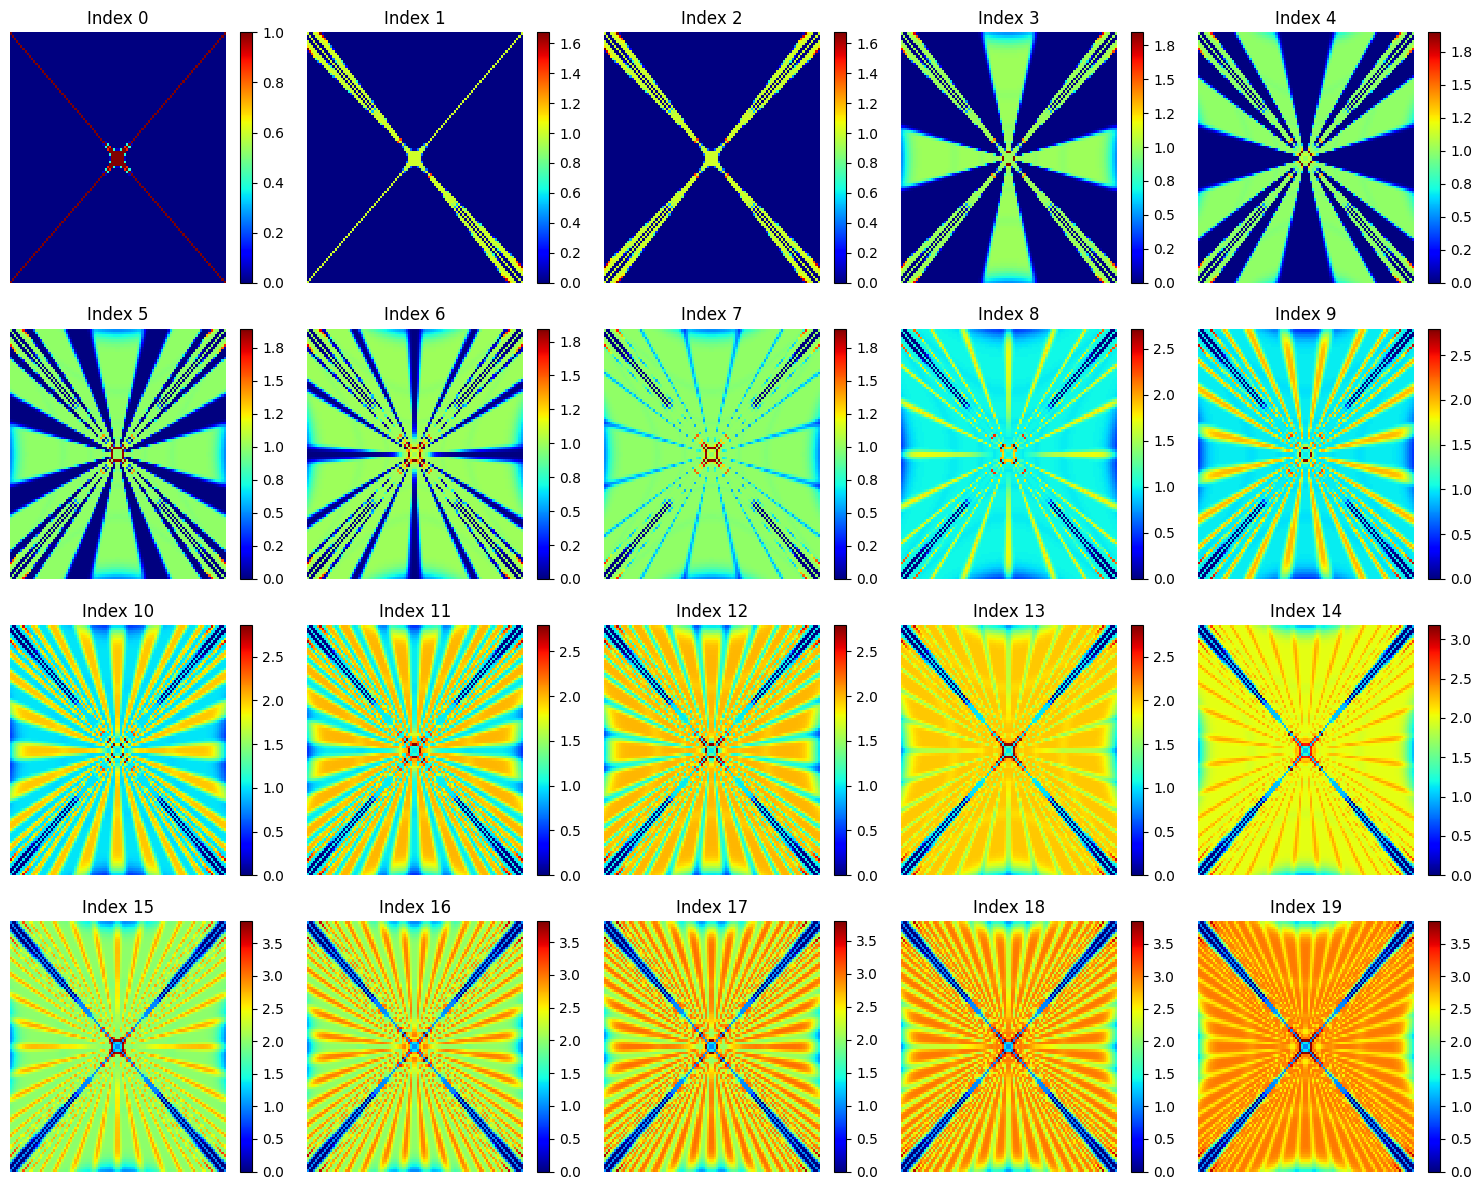

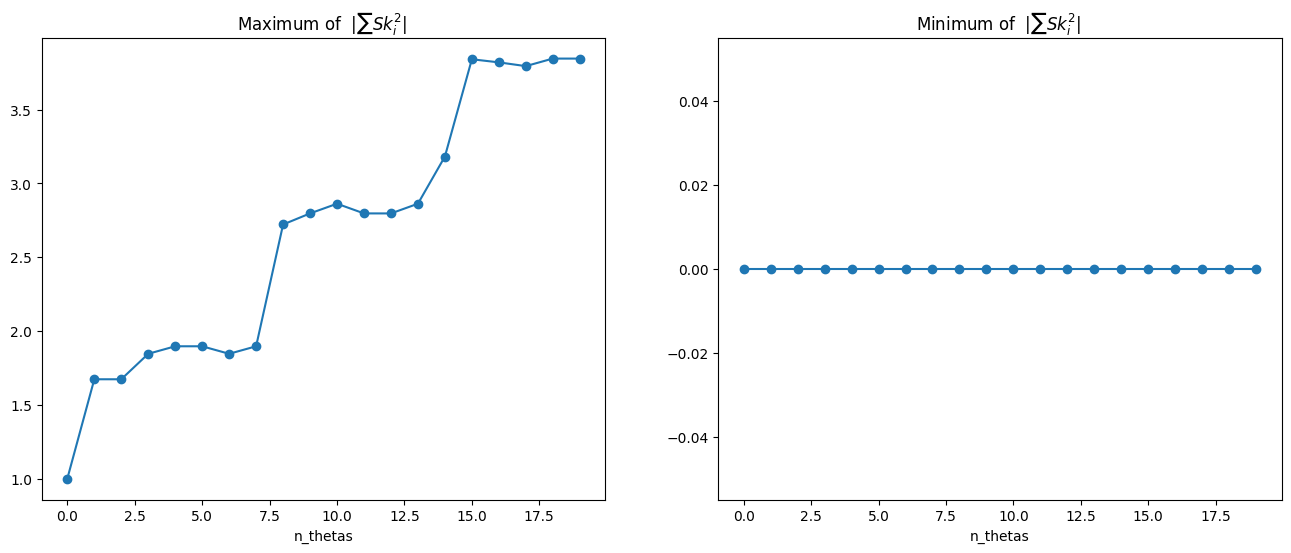

In [27]:
Sk = []
Sk2 = []
N, S = 100, 5
for n_thetas in range(20):
    build_dict = dict(Sk_type = 'boostlet', N = N, S = S, n_thetas = n_thetas)
    Sk.append( load_sk(folder='./', file='dummy', build_dict=build_dict))
    Sk2.append( check_dic(Sk[n_thetas]) )    

plot_array_images(Sk2, num_cols=5)

max_vals = [ np.max( np.abs(sk2) ) for sk2 in Sk2 ]
min_vals = [ np.min( np.abs(sk2) ) for sk2 in Sk2 ]
data = [max_vals, min_vals]
xaxes = [range(len(max_vals)), range(len(max_vals))]
titles = [r"Maximum of  $|\sum Sk_i^2|$ ", r"Minimum of  $|\sum Sk_i^2|$ "]
fig, axes = plt.subplots(1, len(data), figsize=(16,6))
plots = [ax.plot(xax, d, '-o' ) for ax, d, xax in zip(axes, data, xaxes)]

labels = [ax.set_xlabel( r"n_thetas" ) for ax in axes]
ttl = [ax.set_title( titl ) for ax, titl in zip(axes, titles)]
plt.show()

# Shearlets in the saved dictionaries

In [29]:
room = "Balder"
S = 3

folder = "./dependencies/basisFunctions"
file = f"{room}_tau{S}.mat"

file_path = os.path.join(folder, file)
print(file_path)

Sh = sio.loadmat(file_path)['Psi']
print(Sh.shape)

./dependencies/basisFunctions\Balder_tau3.mat
(3623, 128, 29)


(128, 128)

 valores de Sh.*Sh :
 mean: 1.0000000337525463
 min: 0.9997395209691206
 max: 1.0002819136958412


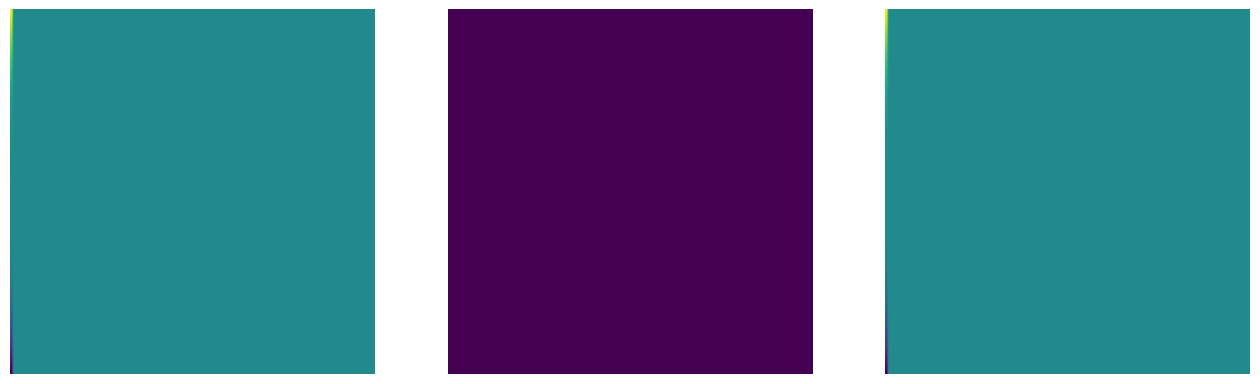

In [30]:
B = np.sum(Sh*Sh, axis=2)

M = B.shape[0]//2
B = B[M-128//2 : M+128//2 , : ]
print(B.shape)

print()
print(" valores de Sh.*Sh :")
print(f" mean: {B.mean()}")
print(f" min: {B.real.min()}")
print(f" max: {B.real.max()}")


fig, ax = plt.subplots(1,3, figsize=(16, 16) )
ax[0].imshow((B).real)
ax[1].imshow((B).imag)
ax[2].imshow(np.abs(B))

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

plt.show()

### The results do not add 1 everywhere for boostlets
+ The results are the same in Matlab and Python (checked the min, max and mean)
+ To recover an image, we project the image in Fourier into the dictionary. The coefficients are also projected in Fourier to the dictionary.
+ F_coef(row, col, d) = F_image(row, col) .* F_dict(row, col, d)
+ F_imageRecov(row, col) = $\sum_d$ F_coef(row, col, d) .* F_dict(row, col, d)
+ F_imageRecov(row, col) = $\sum_d$ F_image(row, col) .* F_dict(row, col, d) .* F_dict(row, col, d) = F_image(row, col) .* $\sum_d$  F_dict(row, col, d)$^2$

Then for the image, to have a perfect reconstruction:
- F_image = F_imageRecov
- $\sum_d$  F_dict(row, col, d)$^2$ = ones(row, col)

The boostlets used here do not return "ones".  
The shearlets used in the Paper for Balder, they return "ones".  
The shearlets from Matlab shearletSystem only return "ones" if the flag PreserveEnergy is active.  